In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Train.txt")
test = pd.read_csv("Test.txt")

In [3]:
train.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"]

In [5]:
train.columns = columns
test.columns = columns

In [6]:
test.head(6)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal,21


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


Attack class feature will be the target.
it consists of 5 categories which will be predicted using multinomial classification. 
0 means normal 
1 means DOS 
2 means Probe 
3 means R2L 
4 means U2R

In [9]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') |
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') |
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') |
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') |
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') |
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') |
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3


In [10]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') |
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') |
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') |
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') |
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') |
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') |
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') |
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [11]:
train.shape

(125972, 44)

Basic Exploratory Analysis

protocol distribution
service distribution
flag distribution
attack distribution
attack class distribution

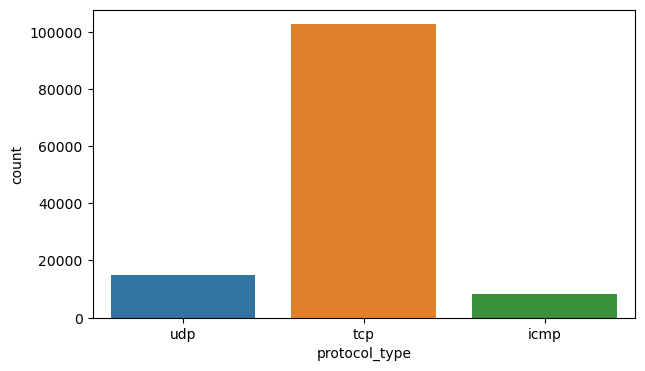

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(x="protocol_type",data = train)
plt.show()

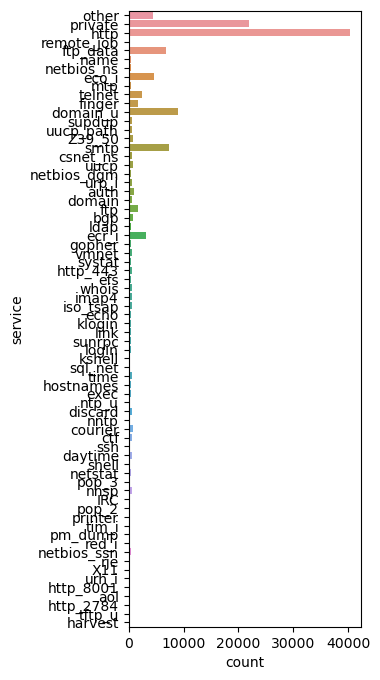

In [93]:
plt.figure(figsize=(3,8))
sns.countplot(y="service", data=train)
plt.show()

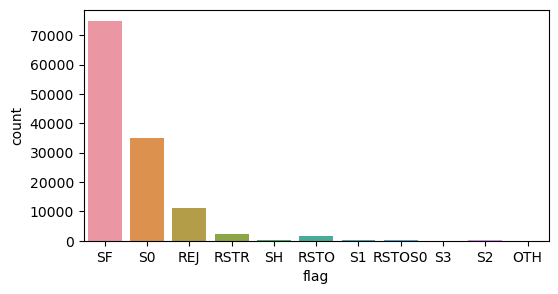

In [14]:
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

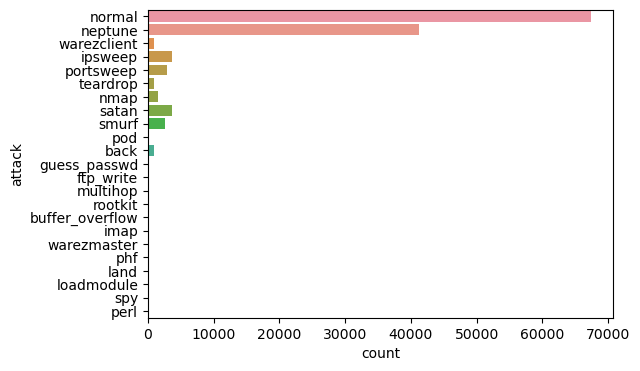

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

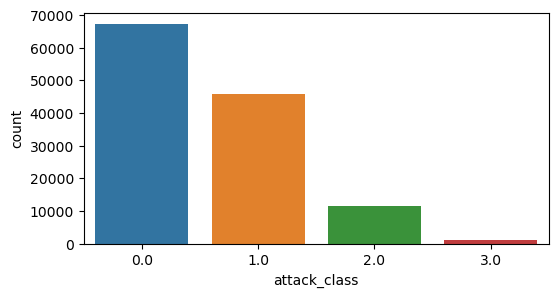

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

In [17]:
train.groupby('attack_class').mean(numeric_only=True).T

attack_class,0.0,1.0,2.0,3.0
duration,168.589899,0.006227,2074.858185,633.417085
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131
land,0.000104,0.000392,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015
hot,0.230658,0.039889,0.001630,8.334673
num_failed_logins,0.001381,0.000000,0.000343,0.056281
logged_in,0.710656,0.020837,0.007121,0.913568
num_compromised,0.507083,0.019226,0.000601,0.077387


In [18]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [19]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [20]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0
5,0,0,0,0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,21,1.0
6,0,0,0,0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,21,1.0
7,0,0,0,0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,21,1.0
8,0,0,0,0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,21,1.0
9,0,0,0,0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [21]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


In [22]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

In [23]:
def create_dummies(df, colname):
  col_dummies = pd.get_dummies(df[colname],prefix = colname, drop_first = True)
  df = pd.concat([df,col_dummies],axis = 1)
  df.drop(colname,axis=1, inplace = True)
  return(df)

In [24]:
#for categorical features we can use cfea variable
for cfea in ['protocol_type', 'service', 'flag', 'attack']:
  train_cat = create_dummies(train_cat, cfea)
  test_cat = create_dummies(test_cat, cfea)
train_cat.head(10)

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
train_final = pd.concat([train_num,train_cat],axis = 1)
test_final = pd.concat([test_num,test_cat],axis=1)
train_final.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
8,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
9,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


Variable Reduction using different techniques
based on 
-low variance 
-high missing values 
-high corelations

In [26]:
train_final.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)


Select K best Technique

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
K_best = train_final[train_final.columns.difference(['attack_class'])]
train_final = train_final.fillna(0)
K_best_new = SelectKBest(f_classif, k=20).fit(K_best, train_final['attack_class'] )

In [28]:
K_best_new.get_support()

array([False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [29]:
#printing the top 20 features we will use to train our model
K_best_features = K_best.columns[K_best_new.get_support()]


In [30]:
#creating scores_list dictionary
scores_list = {}

In [31]:
trainf = train_final
testf = test_final

In [32]:
features = ['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_S0', 'flag_SF', 'last_flag', 'logged_in',
       'same_srv_rate', 'serror_rate', 'service_eco_i', 'service_http']
X_train = trainf[features]
Y_train = trainf['attack_class']
X_test = testf[features]
Y_test = testf['attack_class']

Using different Ml algorithms to train and test the model

1. Linear SVC(SVM)
2. Logistic Regression
3. Neural Network Model
4. GB Naive Bayes 
5. SVC



In [76]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0, tol=1e-5, dual= False)
svm_clf.fit(X_train, Y_train)

LinearSVC(dual=False, random_state=0, tol=1e-05)

In [77]:
y_pred=svm_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [78]:
from sklearn.metrics import accuracy_score
svm_score = svm_clf.score(X_test,Y_test)

In [79]:
scores_list["SVM"] = svm_score

In [80]:
accuracy_score(Y_test, y_pred)

0.8400833961761967

svc

In [70]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [71]:
model.fit(X_train, Y_train)

SVC(class_weight='balanced')

In [72]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 2., 0., 2.])

In [73]:
svc_score = model.score(X_test,Y_test)

In [74]:
scores_list["SVC"] = svc_score

In [75]:
accuracy_score(Y_test, y_pred)

0.713525262831034

In [65]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', max_iter = 10000).fit(X_train, Y_train)

In [66]:
y_pred=lr_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [67]:
lr_score = lr_clf.score(X_test,Y_test)

In [68]:
scores_list["LR"] = lr_score

In [69]:
accuracy_score(Y_test, y_pred)

0.8392849221487824

Neural Network Model

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [82]:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,Y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [84]:
mlp_score = mlp.score(test_X,Y_test)
scores_list["MLP"] = mlp_score

In [85]:
accuracy_score(Y_test, y_pred)

0.8400833961761967

Gaussian Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,Y_train)

GaussianNB()

In [88]:
y_pred=gnb_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [89]:
accuracy_score(Y_test, y_pred)

0.783968415916249

In [90]:
gnb_score = model.score(X_test,Y_test)

In [91]:
scores_list["GNB"] = gnb_score

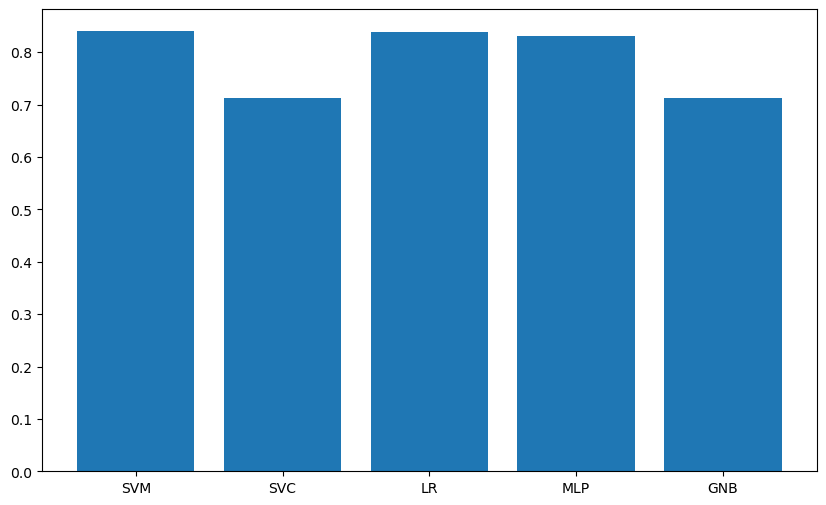

In [92]:
import matplotlib.pyplot as plt
algorithms = list(scores_list.keys())
scores = list(scores_list.values())

plt.figure(figsize=(10,6))
plt.bar(algorithms,scores)
plt.show()



voting ensemble algorithm to combine predictions from multiple algorithms

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

In [58]:

kfold = model_selection.KFold(n_splits=10)
#creating the sub models
estimate = []
model1 = LinearSVC()
estimate.append(("svm",model1))
model2 = SVC()
estimate.append(("svc",model2))
model3 = LogisticRegression()
estimate.append(("logist",model3))
model4 = MLPClassifier()
estimate.append(("mlp", model4))
model5 = GaussianNB()
estimate.append(("gnb",model5))
#create the ensemble
ensemble = VotingClassifier(estimate)
ensemble.fit(X_train,Y_train)

C:\Users\pranav\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\pranav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pranav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svm', LinearSVC()), ('svc', SVC()),
                             ('logist', LogisticRegression()),
                             ('mlp', MLPClassifier()), ('gnb', GaussianNB())])

In [59]:
y_pred=ensemble.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [60]:
accuracy_score( Y_test, y_pred )

0.8379984917712816